# What happens if I can't get a good fit?

Let's try the completely-made-up example from the "What is Sherpa?" notebook:

In [1]:
from sherpa.astro.ui import *

In [2]:
load_arrays(1, [1, 2, 5, 10], [9, -2, 12, 14])
set_source(polynom1d.mdl)
mdl.c1.thaw()
fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 19.355
Final fit statistic   = 9.79605 at function evaluation 6
Data points           = 4
Degrees of freedom    = 2
Probability [Q-value] = 0.0074613
Reduced statistic     = 4.89803
Change in statistic   = 9.55892
   mdl.c0         -2.58909     +/- 2.33419     
   mdl.c1         1.73737      +/- 0.597081    


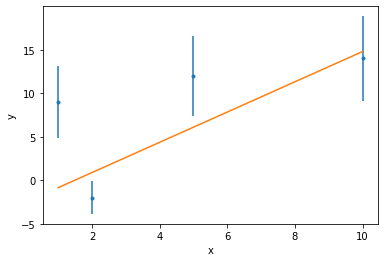

In [3]:
plot_fit()

In [4]:
calc_stat_info()

Dataset               = 1
Statistic             = chi2gehrels
Fit statistic value   = 9.79605
Data points           = 4
Degrees of freedom    = 2
Probability [Q-value] = 0.0074613
Reduced statistic     = 4.89803


The problem is that the reduced statistic is ~5, which means that some of the error analysis routines will error out:

In [5]:
covar()

Dataset               = 1
Confidence Method     = covariance
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
covariance 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   mdl.c0           -2.58909     -2.33419      2.33419
   mdl.c1            1.73737    -0.597081     0.597081


Unfortunately this is a problem:

In [6]:
conf()

EstErr: reduced statistic larger than 3

# What does this mean?


The error-analysis routines (well, those other than `covar`) are essentially trying to climb up from the minimum until we are a given height from the minimum. We do have a couple of routines that let us view the search surface. Here we look at "region-projection" (2D) and "interval-projection" (1D): 

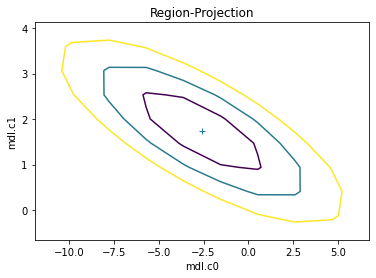

In [7]:
reg_proj(mdl.c0, mdl.c1)

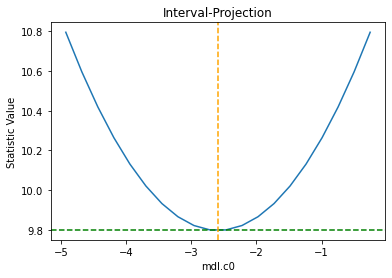

In [8]:
int_proj(mdl.c0)

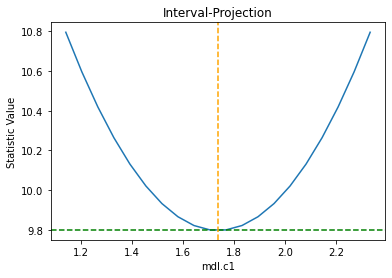

In [9]:
int_proj(mdl.c1)

The search surface here is actually quite "nicely behaved" so these don't actually look bad - the 1D values look somewhat parabolic and the 2D version is nicely bounded.

The problem here is that we have a "bad" point, that just keeps us away getting to a "good fit". The residual plot doesn't make it obvious of this:

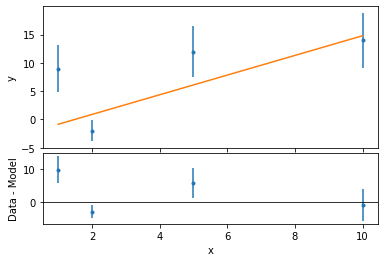

In [10]:
plot_fit_resid()

We can try ignoring values, such as the second point:

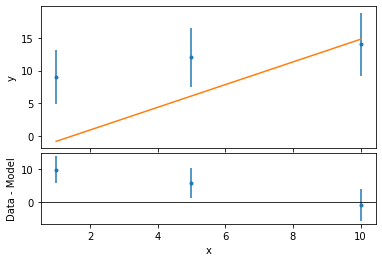

In [11]:
ignore(1.5, 2.5)

plot_fit_resid()

In [12]:
fit()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 7.40466
Final fit statistic   = 0.0196631 at function evaluation 6
Data points           = 3
Degrees of freedom    = 1
Probability [Q-value] = 0.888482
Reduced statistic     = 0.0196631
Change in statistic   = 7.385
   mdl.c0         8.68041      +/- 4.29407     
   mdl.c1         0.558286     +/- 0.706193    


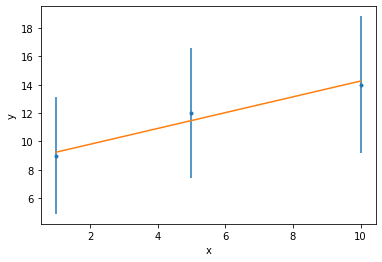

In [13]:
plot_fit()

In [14]:
calc_stat_info()

Dataset               = 1
Statistic             = chi2gehrels
Fit statistic value   = 0.0196631
Data points           = 3
Degrees of freedom    = 1
Probability [Q-value] = 0.888482
Reduced statistic     = 0.0196631


For reference we can use `get_stat_info`, which returns a structure for each dataset:

In [15]:
sinfo = get_stat_info()
sinfo

[<Statistic information results instance>]

In [16]:
sinfo[0]  # rich text interface

<Statistic information results instance>

This looks better, and we can now use `conf`:

In [17]:
conf()

mdl.c0 lower bound:	-4.29407
mdl.c0 upper bound:	4.29407
mdl.c1 lower bound:	-0.706193
mdl.c1 upper bound:	0.706193
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   mdl.c0            8.68041     -4.29407      4.29407
   mdl.c1           0.558286    -0.706193     0.706193


In [18]:
get_conf_results()

Parameter,Best-fit value,Lower Bound,Upper Bound
mdl.c0,8.68041,-4.29407,4.29407
mdl.c1,0.558286,-0.706193,0.706193


# So is it just a case of ignoring a single point?

Unfortunately no. For this dataset we could ignore different points and still get a "good" fit:

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 39.9838
Final fit statistic   = 2.50522 at function evaluation 6
Data points           = 3
Degrees of freedom    = 1
Probability [Q-value] = 0.113469
Reduced statistic     = 2.50522
Change in statistic   = 37.4786
   mdl.c0         -5.83601     +/- 2.62572     
   mdl.c1         2.25876      +/- 0.627529    


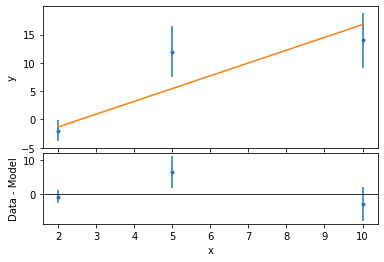

In [19]:
notice()
ignore(None, 1.5)  # ignore the first point this time
fit()
plot_fit_resid()

This is not as good, but it passes the "magical" reduced-statistic < 3 condition, so:

In [20]:
conf()

mdl.c0 lower bound:	-2.62572
mdl.c0 upper bound:	2.62572
mdl.c1 lower bound:	-0.627529
mdl.c1 upper bound:	0.627529
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   mdl.c0           -5.83601     -2.62572      2.62572
   mdl.c1            2.25876    -0.627529     0.627529


# Okay, can I just ignore the limit?

Well, there is an option you can do this with:

In [21]:
get_conf_opt()

{'sigma': 1,
 'eps': 0.01,
 'maxiters': 200,
 'soft_limits': False,
 'remin': 0.01,
 'fast': False,
 'parallel': True,
 'numcores': 12,
 'maxfits': 5,
 'max_rstat': 3,
 'tol': 0.2,
 'verbose': False,
 'openinterval': False}

In [22]:
notice()
fit()
conf()

Dataset               = 1
Method                = levmar
Statistic             = chi2gehrels
Initial fit statistic = 11.8131
Final fit statistic   = 9.79605 at function evaluation 6
Data points           = 4
Degrees of freedom    = 2
Probability [Q-value] = 0.0074613
Reduced statistic     = 4.89803
Change in statistic   = 2.01704
   mdl.c0         -2.58909     +/- 2.33419     
   mdl.c1         1.73737      +/- 0.597081    


EstErr: reduced statistic larger than 3

In [23]:
set_conf_opt('max_rstat', 5)

In [24]:
conf()

mdl.c0 lower bound:	-2.33419
mdl.c0 upper bound:	2.33419
mdl.c1 lower bound:	-0.597081
mdl.c1 upper bound:	0.597081
Dataset               = 1
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2gehrels
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   mdl.c0           -2.58909     -2.33419      2.33419
   mdl.c1            1.73737    -0.597081     0.597081


Please, **do not do this**. I actually think that the `max_rstat = 3` limit is too lax and we really should use a more-stringent limit, but I don't think this would be popular.

In [25]:
set_conf_opt('max_rstat', 3)

# So what can I do?

- tweak the range of the independent axis
- we may be stuck in a local, rather than global, minimum
- modify the model expression
- give up and eat ice-cream

If we can't tweak the data being fitted then we are probably in a situation that the used model does not represent the data, and **could** be because we are in the wrong area of the search space - so we can try

- changing the optimiser ([set_method](https://cxc.cfa.harvard.edu/sherpa/ahelp/set_method.html)), particularly to ["moncar"](https://cxc.cfa.harvard.edu/sherpa/ahelp/montecarlo.html) which is likely to be slow, but can search complex surfaces,
- or change the model. In this case you should look at [calc_ftest](https://cxc.cfa.harvard.edu/sherpa/ahelp/calc_ftest.html) and [calc_mlr](https://cxc.cfa.harvard.edu/sherpa/ahelp/calc_mlr.html) which let you identify whether one model is "better" than the other (**but** there are significant restrictions on how they are used).

This is much easier (unfortunately this does not mean it is easy) in an interactive session than in scripts where you are fitting many data sets.